In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

from warnings import filterwarnings
filterwarnings('ignore')

df=pd.read_csv(r'C:\Users\DELL\Desktop\supermarket_sales.csv')

In [190]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [ ]:
%matplotlib inline

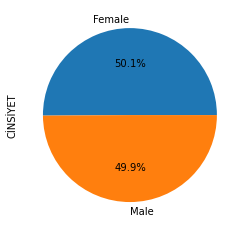

In [7]:
df.Gender.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("CİNSİYET");

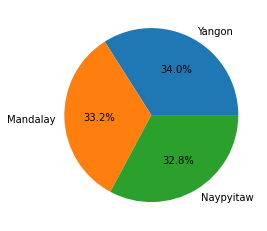

In [8]:
df.City.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("");

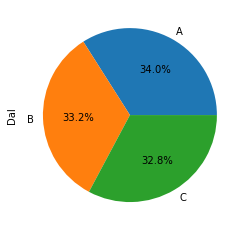

In [9]:
df.Branch.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("Dal");

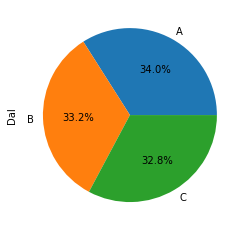

In [10]:
df.Branch.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("Dal");

In [11]:
df.rename(columns = {"Product line": "Product_line"
                    }, inplace = True)

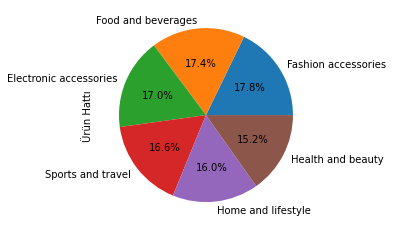

In [12]:
df.Product_line.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("Ürün Hattı");

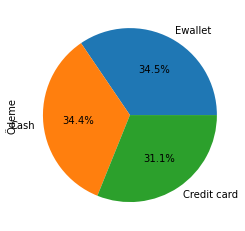

In [13]:
df.Payment.value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.ylabel("Ödeme");

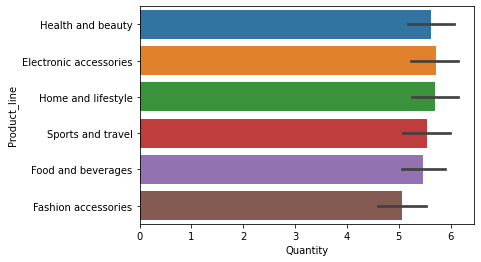

In [14]:
sns.barplot(x = "Quantity" , y= "Product_line" , data =df);

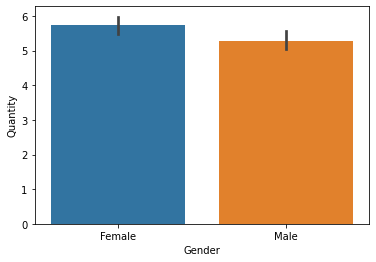

In [15]:
sns.barplot(x = "Gender" , y= "Quantity" , data =df);

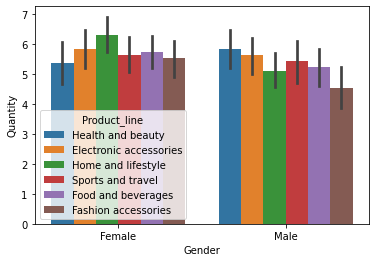

In [16]:
sns.barplot(x = "Gender" , y= "Quantity" , hue = "Product_line" , data =df);

In [17]:
df.rename(columns = {"Tax 5%": "Tax"
                    }, inplace = True)

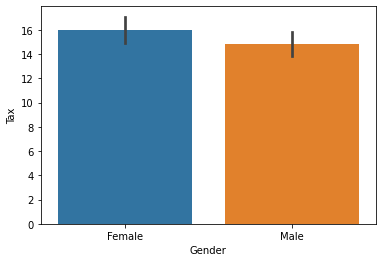

In [18]:
sns.barplot(x = "Gender" , y= "Tax" , data =df);

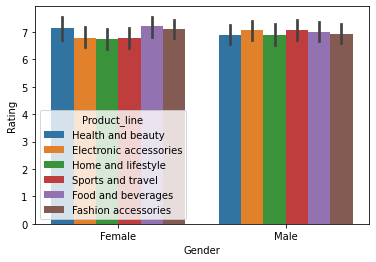

In [19]:
sns.barplot(x = "Gender" , y= "Rating" , hue = "Product_line" , data =df);

In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product_line,Unit price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
df.rename(columns = {"Unit price": "Unit_price"
                    }, inplace = True)

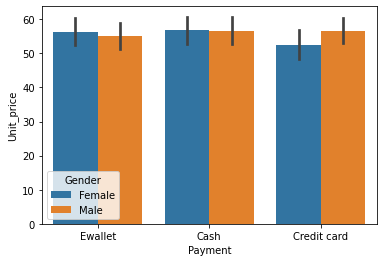

In [22]:
sns.barplot(x = "Payment", y= "Unit_price" , hue = "Gender" , data =df);

In [24]:
# gender makine öğrenmesi için veri ön işlemesi string ifadeleri 
# sayısal ifadelere çevirme

In [25]:
df["Gender"] = df.Gender.map({"Female" : 1, "Male":2})

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,2,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,2,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,2,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
df.rename(columns = {"Product line": "Product_line"
                    }, inplace = True)

In [28]:
df.Product_line.unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [29]:
df["Product_line"] = df.Product_line.map({"Health and beauty": 1, "Electronic accessories" :2, "Home and lifestyle": 3,
                     "Sports and travel": 4, "Food and beverages":5, "Fashion accessories" : 6})

In [30]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [32]:
df.Payment.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [33]:
df["Payment"] =df.Payment.map({"Ewallet": 1, "Cash" :2, "Credit card":3})

In [35]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [36]:
df.Customer_type.unique()

array(['Member', 'Normal'], dtype=object)

In [37]:
df["Customer_type"] = df.Customer_type.map({"Member": 1, "Normal" :2})

In [38]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [39]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [40]:
df["City"] = df.City.map({"Yangon": 1, "Naypyitaw" :2, "Mandalay" :3})

In [41]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [42]:
df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [43]:
df["Branch"] = df.Branch.map({"A": 1, "C" :2, "B" :3})

In [192]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [45]:
#makine öğrenmesi

In [46]:
# bağımlı ve bağımsız değişken

In [47]:
#iki bağımsız değişken Gender, Product_line

In [48]:
x = df [['Gender','Branch']]

In [49]:
#bağımlı değişken total

In [51]:
y = df ['Total']

In [52]:
#saçılım grafiği

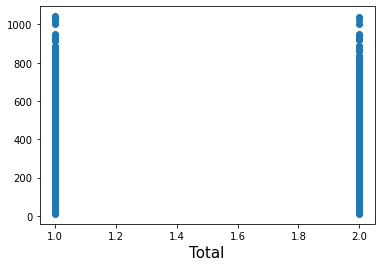

In [53]:
plt.scatter(x['Gender'], y)

plt.xlabel('Gender', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

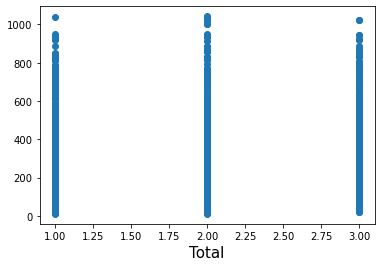

In [54]:
plt.scatter(x['Branch'], y)

plt.xlabel('Branch', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

In [55]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [56]:
#regresyonun kesim noktası

In [57]:
reg.intercept_

352.00029344256734

In [58]:
#regresynun kat sayıları

In [59]:
reg.coef_

array([-24.23310318,   3.66058094])

In [ ]:
#sklearn içinde r karesini hesaplamak

In [60]:
reg.score(x,y) #r kare

0.002594450424785233

In [61]:
x.shape 

(1000, 2)

In [62]:
#düzeltilmiş r kareyi bulmak için, r kareyi, gözlem sayısını ve özellik sayısını bilmeliyiz
r2= reg.score(x,y)

#gözlem sayısı  (n), eksen 0 boyunca olan şekildir
n=x.shape[0]

#özellik sayısı (öngörücüler , p) eksen 1 boyunca şeklidir
p= x.shape[1]

#düzeltilmiş r kareyi aşağıdaki formulle buluruz
düzeltilmis_r2= 1-(1-r2)*(n-1)/(n-p-1)
düzeltilmis_r2

0.0005936368850154583

In [63]:
reg.predict([[1,1]]) #branch a ve cinsiyet kadın olan birinin ortalama totali

array([331.4277712])

In [64]:
reg.predict([[1,2]])    #branch a ve cinsiyet erkek olan birinin ortalama totali

array([335.08835213])

In [65]:
reg.predict([[2,1]])       #branch c ve cinsiyet kadın olan birinin ortalama totali

array([307.19466802])

In [66]:
reg.predict([[2,2]])       #branch c ve cinsiyet erkek olan birinin ortalama totali

array([310.85524895])

In [67]:
reg.predict([[3,1]])       #branch b ve cinsiyet kadın olan birinin ortalama totali

array([282.96156484])

In [68]:
reg.predict([[3,2]])       #branch b ve cinsiyet erkek olan birinin ortalama totali

array([286.62214578])

In [69]:
yeni_df =pd.DataFrame({'Branch': [4,5,6], 'Gender': [1,2,3] }) 
yeni_df

,Branch,Gender
0,4,1
1,5,2
2,6,3


In [70]:
reg.predict(yeni_df).round(1) 

array([258.7, 238.2, 217.6])

In [71]:
yeni_df['Tahmini Total'] =reg.predict(yeni_df) 
yeni_df 

,Branch,Gender,Tahmini Total
0,4,1,258.728462
1,5,2,238.155939
2,6,3,217.583417


In [72]:
f_regression(x,y)

(array([2.44649215, 0.16384422]), array([0.11810485, 0.68572835]))

In [73]:
p_values= f_regression(x,y) [1]
p_values

array([0.11810485, 0.68572835])

In [74]:
p_values.round(3)

array([0.118, 0.686])

In [75]:
reg_summary= pd.DataFrame(data= x.columns.values, columns= ['özellik'])
reg_summary ['Katsayılar'] = reg.coef_
reg_summary ['p-değerleri'] = p_values.round(3)
reg_summary



,özellik,Katsayılar,p-değerleri
0,Gender,-24.233103,0.118
1,Branch,3.660581,0.686


In [76]:
#görünüşe göre gender ve branch istatiksel olarak anlamlıdır ve datadan cıkarılmamalıdır.

In [78]:
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3


In [107]:
x = df [['Product_line','City']]

In [108]:
y = df ['Total']

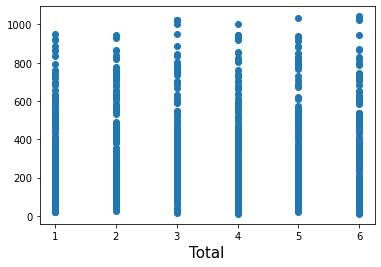

In [94]:
plt.scatter(x['Product_line'], y)

plt.xlabel('Product_line', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

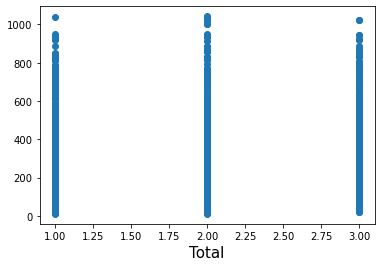

In [109]:
plt.scatter(x['City'], y)

plt.xlabel('City', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

In [110]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [111]:
reg.intercept_

324.80319137165895

In [112]:
reg.coef_

array([-2.69406845,  3.91172603])

In [113]:
reg.score(x,y)

0.0005140805839444207

In [114]:
x.shape

(1000, 2)

In [115]:
#düzeltilmiş r kareyi bulmak için, r kareyi, gözlem sayısını ve özellik sayısını bilmeliyiz
r2= reg.score(x,y)

#gözlem sayısı  (n), eksen 0 boyunca olan şekildir
n=x.shape[0]

#özellik sayısı (öngörücüler , p) eksen 1 boyunca şeklidir
p= x.shape[1]

#düzeltilmiş r kareyi aşağıdaki formulle buluruz
düzeltilmis_r2= 1-(1-r2)*(n-1)/(n-p-1)
düzeltilmis_r2

-0.0014909062152854702

In [116]:
df.head(777)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,201-63-8275,2,2,1,1,4,67.99,7,23.7965,499.7265,2/17/2019,16:50,1,475.93,4.761905,23.7965,5.7
773,471-06-8611,2,2,2,1,5,52.42,1,2.6210,55.0410,2/6/2019,10:22,3,52.42,4.761905,2.6210,6.3
774,200-16-5952,2,2,1,2,5,65.65,2,6.5650,137.8650,1/17/2019,16:46,2,131.30,4.761905,6.5650,6.0
775,120-54-2248,3,3,2,1,5,28.86,5,7.2150,151.5150,1/22/2019,18:08,3,144.30,4.761905,7.2150,8.0


In [117]:
reg.predict([[1,1]]) 

array([326.02084896])

In [129]:
reg.predict([[2,1]]) 

array([323.32678051])

In [130]:
reg.predict([[3,1]]) 

array([320.63271206])

In [131]:
reg.predict([[4,1]]) 

array([317.93864362])

In [132]:
reg.predict([[5,1]]) 

array([315.24457517])

In [133]:
reg.predict([[6,1]]) 

array([312.55050672])

In [134]:
reg.predict([[1,2]]) 

array([329.93257499])

In [136]:
reg.predict([[2,2]]) 

array([327.23850654])

In [137]:
reg.predict([[3,2]]) 

array([324.5444381])

In [138]:
reg.predict([[4,2]]) 

array([321.85036965])

In [139]:
reg.predict([[5,2]]) 

array([319.1563012])

In [140]:
reg.predict([[6,2]]) 

array([316.46223276])

In [141]:
reg.predict([[1,3]]) 

array([333.84430103])

In [158]:
reg.predict([[2,3]]) 

array([331.15023258])

In [142]:
reg.predict([[3,3]]) 

array([328.45616413])

In [143]:
reg.predict([[4,3]]) 

array([325.76209568])

In [144]:
reg.predict([[5,3]]) 

array([323.06802724])

In [145]:
reg.predict([[6,3]]) 

array([320.37395879])

In [154]:
p_values= f_regression(x,y) [1]
p_values

array([0.5580581 , 0.68572835])

In [155]:
p_values.round(3)

array([0.558, 0.686])

In [156]:
reg_summary= pd.DataFrame(data= x.columns.values, columns= ['özellik'])
reg_summary ['Katsayılar'] = reg.coef_
reg_summary ['p-değerleri'] = p_values.round(3)
reg_summary



,özellik,Katsayılar,p-değerleri
0,Product_line,-2.694068,0.558
1,City,3.911726,0.686


In [157]:
#görünüşe göre gender ve branch istatiksel olarak anlamlıdır ve datadan cıkarılmamalıdır.

In [159]:
df.head(777)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,201-63-8275,2,2,1,1,4,67.99,7,23.7965,499.7265,2/17/2019,16:50,1,475.93,4.761905,23.7965,5.7
773,471-06-8611,2,2,2,1,5,52.42,1,2.6210,55.0410,2/6/2019,10:22,3,52.42,4.761905,2.6210,6.3
774,200-16-5952,2,2,1,2,5,65.65,2,6.5650,137.8650,1/17/2019,16:46,2,131.30,4.761905,6.5650,6.0
775,120-54-2248,3,3,2,1,5,28.86,5,7.2150,151.5150,1/22/2019,18:08,3,144.30,4.761905,7.2150,8.0


In [160]:
x = df [['Product_line', 'Customer_type']]

In [161]:
y = df ['Total']

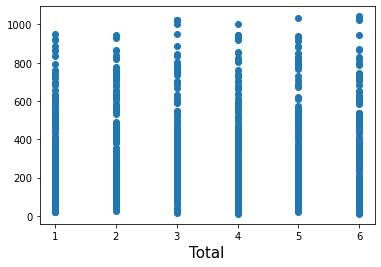

In [162]:
plt.scatter(x['Product_line'], y)

plt.xlabel('Product_line', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

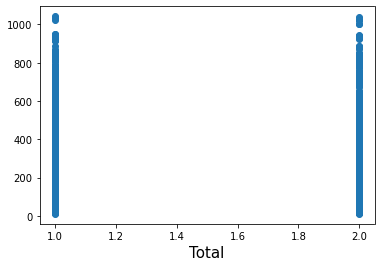

In [163]:
plt.scatter(x['Customer_type'], y)

plt.xlabel('Customer_type', fontsize=15)
plt.xlabel('Total', fontsize=15)

plt.show()

In [164]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [165]:
reg.intercept_

347.61673123796913

In [166]:
reg.coef_

array([-2.74329676, -9.90356212])

In [167]:
reg.score(x,y)

0.0007495890383953929

In [168]:
x.shape

(1000, 2)

In [169]:
#düzeltilmiş r kareyi bulmak için, r kareyi, gözlem sayısını ve özellik sayısını bilmeliyiz
r2= reg.score(x,y)

#gözlem sayısı  (n), eksen 0 boyunca olan şekildir
n=x.shape[0]

#özellik sayısı (öngörücüler , p) eksen 1 boyunca şeklidir
p= x.shape[1]

#düzeltilmiş r kareyi aşağıdaki formulle buluruz
düzeltilmis_r2= 1-(1-r2)*(n-1)/(n-p-1)
düzeltilmis_r2

-0.0012549253266229687

In [170]:
df.head(777)

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,1,1,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,2,2,1,2,15.28,5,3.8200,80.2200,3/8/2019,10:29,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,1,2,2,3,46.33,7,16.2155,340.5255,3/3/2019,13:23,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,1,1,2,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,1,2,2,4,86.31,7,30.2085,634.3785,2/8/2019,10:37,1,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,201-63-8275,2,2,1,1,4,67.99,7,23.7965,499.7265,2/17/2019,16:50,1,475.93,4.761905,23.7965,5.7
773,471-06-8611,2,2,2,1,5,52.42,1,2.6210,55.0410,2/6/2019,10:22,3,52.42,4.761905,2.6210,6.3
774,200-16-5952,2,2,1,2,5,65.65,2,6.5650,137.8650,1/17/2019,16:46,2,131.30,4.761905,6.5650,6.0
775,120-54-2248,3,3,2,1,5,28.86,5,7.2150,151.5150,1/22/2019,18:08,3,144.30,4.761905,7.2150,8.0


In [171]:
reg.predict([[1,1]]) 

array([334.96987236])

In [172]:
reg.predict([[2,1]]) 

array([332.2265756])

In [173]:
reg.predict([[3,1]]) 

array([329.48327884])

In [174]:
reg.predict([[4,1]]) 

array([326.73998208])

In [175]:
reg.predict([[5,1]]) 

array([323.99668532])

In [176]:
reg.predict([[6,1]]) 

array([321.25338856])

In [177]:
reg.predict([[1,2]]) 

array([325.06631023])

In [178]:
reg.predict([[2,2]]) 

array([322.32301347])

In [179]:
reg.predict([[3,2]]) 

array([319.57971672])

In [180]:
reg.predict([[4,2]]) 

array([316.83641996])

In [181]:
reg.predict([[5,2]]) 

array([314.0931232])

In [182]:
reg.predict([[6,2]]) 

array([311.34982644])

In [183]:
p_values= f_regression(x,y) [1]
p_values

array([0.5580581 , 0.53439496])

In [184]:
p_values.round(3)

array([0.558, 0.534])

In [185]:
reg_summary= pd.DataFrame(data= x.columns.values, columns= ['özellik'])
reg_summary ['Katsayılar'] = reg.coef_
reg_summary ['p-değerleri'] = p_values.round(3)
reg_summary


,özellik,Katsayılar,p-değerleri
0,Product_line,-2.743297,0.558
1,Customer_type,-9.903562,0.534


In [193]:
#görünüşe göre Product_line ve Customer_type istatiksel olarak anlamlıdır ve datadan cıkarılmamalıdır.